# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return (x**2) * numpy.sin(x);

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    '''Analytical integral of f(x).'''
    return 2*x*numpy.sin(x) - (x**2 - 2)*(numpy.cos(x)) - 2;

Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax) - g(xmin);

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [9]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with N panels.
    '''

    delta_x = (xmax - xmin)/N
    
    f_mid_range = numpy.arange(1, 2*N, 2)
    f_mid = 0
    for i in f_mid_range:
        f_mid = f_mid + f(xmin + i*(delta_x/2))
        
    f_x_range = numpy.arange(1, N, 1)
    f_x = 0
    for i in f_x_range:
        f_x = f_x + f(xmin + i*delta_x)
    
    return ((delta_x/6) * (f(xmin) + 4*f_mid + 2*f_x + f(xmax)));

Make sure you have implemented Simpson's rule correctly:

In [10]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


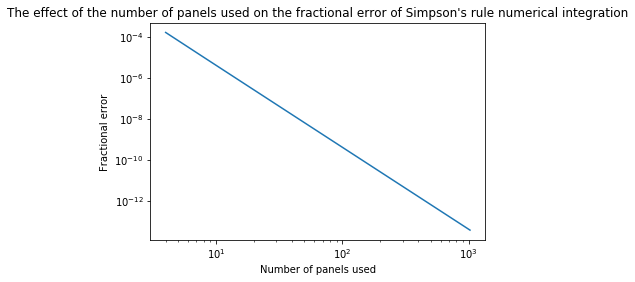

In [13]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = numpy.array([4, 8, 16, 32, 64, 128, 256, 512, 1024])# Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

result_numeric = [] #Creates an array to store the values from the numerical integration calculation
for i in range (0,9): #Loops over values in panel_counts
    result_numeric.append(integrate_numeric(x0, x1, panel_counts[i])) #Appends the values from the integration calulcation to the result_numeric array
                                                                
fractional_error = abs((result_analytic - result_numeric)/result_analytic) #Calulates the fractional error when using the numerical integration method

plt.xlabel("Number of panels used") #x axis label
plt.ylabel("Fractional error") #y axis label
plt.title("The effect of the number of panels used on the fractional error of Simpson's rule numerical integration") #Title for the graph
plt.loglog(panel_counts, fractional_error) #Plots a logarithmic graph

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels reduces the fractional error on the numerical calculation of the integration using the Simpson's Rule method, and so increases the accuracy of the numerical method. However, if the number of panels used in the calculation is too large, more of a computer's limited memory and processing power will be used up to achieve only a minimal decrease in the fractional error. As well as this, if the numer of panels used is too large, the size of dx used in the calulation will become too small, and the numerical method will lose accuracy because of the occurance of roundoff errors caused by the computer only storing numbers to a finite precision.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

oIf 